# Modelling (2/2 - Categorisation Machine Learning)

Having run clustering analysis in the previous workbook, we move onto our categorisation exercises.

Remember, the aim here is to create a model to predict what kind of seat each constituency is, based on its characteristics. We will then investigate which issues are the most influential in deciding who votes for what party.

Once we come onto the modelling part of the workbook, we will try out various algorithms to see which gives us the most accurate predictions, including:

* Decision Trees
* Random Forests
* XGBoost


# 1) Import libraries

We have several libraries to import in order to carry out these analyses.

In [1]:
#For data manipulation
import numpy as np
import pandas as pd

#For data visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib.font_manager
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from matplotlib.pylab import rcParams

#For data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#For gridsearching
from sklearn.model_selection import GridSearchCV

#For decision trees/random forests
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

#For xgboost
import xgboost as xgb

#For performance evaluation
import time
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import eli5
from eli5.sklearn import PermutationImportance
import shap

#Suppress warnings from showing
import warnings
warnings.filterwarnings('ignore')

#Allow ourselves to save things
import pickle

In [2]:
#Define colours for the visuals
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

CB91_BlueD = '#016794'
CB91_GreenD = '#187970'
CB91_PinkD = '#B317B1'
CB91_PurpleD = '#4E1762'
CB91_VioletD = '#330E4C'
CB91_AmberD = '#985E09'

CB91_BlueL = '#ABE5FF'
CB91_GreenL = '#B5F1EB'
CB91_PinkL = '#FAD9FA'
CB91_PurpleL = '#D9A8EB'
CB91_VioletL = '#ECD4F5'
CB91_AmberL = '#F9D094'


#The following gradients will be used for heatmaps, etc
CB91_Grad_BP = ['#2CBDFE', '#2fb9fc', '#33b4fa', '#36b0f8',
                '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',
                '#489bee', '#4b97ec', '#4f92ea', '#528ee8',
                '#568ae6', '#5986e4', '#5c81e2', '#607de0',
                '#6379de', '#6775dc', '#6a70da', '#6e6cd8',
                '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',
                '#7f57cf', '#8353cd', '#864ecb', '#894ac9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1',
                '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',
                '#a924b7', '#ac20b5', '#b01bb3', '#b317b1']

CB91_Grad_BA = ['#2cbdfe', '#31bdf9', '#36bcf5', '#3bbcf0',
                '#41bcec', '#46bbe7', '#4bbbe3', '#50bbde',
                '#55bbd9', '#5abad5', '#60bad0', '#65bacc',
                '#6ab9c7', '#6fb9c3', '#74b9be', '#79b8ba',
                '#7eb8b5', '#84b8b0', '#89b7ac', '#8eb7a7',
                '#93b7a3', '#98b79e', '#9db69a', '#a3b695',
                '#a8b690', '#adb58c', '#b2b587', '#b7b583',
                '#bcb47e', '#c1b47a', '#c7b475', '#ccb371',
                '#d1b36c', '#d6b367', '#dbb363', '#e0b25e',
                '#e6b25a', '#ebb255', '#f0b151', '#f5b14c']

CB91_Grad_AP = ['#f5b14c', '#f3ae4f', '#f0aa52', '#eea755',
                '#eca458', '#eaa05c', '#e79d5f', '#e59962',
                '#e39665', '#e19368', '#de8f6b', '#dc8c6e',
                '#da8971', '#d88574', '#d58277', '#d37f7b',
                '#d17b7e', '#cf7881', '#cc7584', '#ca7187',
                '#c86e8a', '#c66a8d', '#c36790', '#c16493',
                '#bf6096', '#bd5d9a', '#ba5a9d', '#b856a0',
                '#b653a3', '#b450a6', '#b14ca9', '#af49ac',
                '#ad46af', '#ab42b2', '#a83fb5', '#a63bb9',
                '#a438bc', '#a235bf', '#9f31c2', '#9d2ec5']

CB91_Grad_GP = ['#47dbcd', '#4bd9ce', '#50d8cf', '#54d6d0',
                '#59d5d1', '#5dd3d2', '#61d2d3', '#66d0d4',
                '#6acfd5', '#6fcdd6', '#73ccd6', '#78cad7',
                '#7cc9d8', '#80c7d9', '#85c6da', '#89c4db',
                '#8ec3dc', '#92c1dd', '#96c0de', '#9bbedf',
                '#9fbde0', '#a4bbe1', '#a8bae2', '#acb8e3',
                '#b1b7e4', '#b5b5e5', '#bab4e6', '#beb2e7',
                '#c2b1e8', '#c7afe9', '#cbaee9', '#d0acea',
                '#d4abeb', '#d9a9ec', '#dda8ed', '#e1a6ee',
                '#e6a5ef', '#eaa3f0', '#efa2f1', '#f3a0f2']

CB91_Grad_GWP= ['#47dbcd','#4fdcce','#56ddd0','#5dded1',
                '#64dfd2','#6ae0d3','#70e1d5','#75e2d6',
                '#7be3d7','#80e4d8','#85e5da','#8ae6db',
                '#8fe7dc','#94e8dd','#98e9df','#9deae0',
                '#a1ebe1','#a6ece2','#aaede4','#afede5',
                '#b3eee6','#b7efe8','#bbf0e9','#c0f1ea',
                '#c4f2eb','#c8f3ed','#ccf4ee','#d0f5ef',
                '#d4f6f1','#d8f6f2','#dcf7f3','#e0f8f5',
                '#e4f9f6','#e8faf7','#ecfbf8','#f0fcfa',
                '#f3fcfb','#f7fdfc','#fbfefe','#ffffff',
                '#fdfafe','#fbf5fc','#f9f0fb','#f7eaf9',
                '#f4e5f8','#f2e0f7','#f0dbf5','#eed6f4',
                '#ecd1f2','#e9ccf1','#e7c7f0','#e5c1ee',
                '#e2bced','#e0b7eb','#deb2ea','#dbade8',
                '#d9a8e7','#d6a3e5','#d49ee4','#d199e2',
                '#cf94e1','#cc8fdf','#ca89de','#c784dc',
                '#c57fdb','#c27ad9','#bf75d8','#bd6fd6',
                '#ba6ad5','#b765d3','#b45fd2','#b25ad0',
                '#af54cf','#ac4ecd','#a949cb','#a642ca',
                '#a33cc8','#a035c7','#9d2ec5']

#Add party colors
con_blue = '#0A3B7C'
lab_red = '#E4003B'
lib_yel = '#FAA61A'
snp_yel = '#FFF481'
green_green = '#52DF00'
brex_blue = '#00E2ED'
ukip_pur = '#470A65'
plaid_green = '#006A56'

con_lab = '#992281'
con_lib = '#837859'
con_snp = '#85987f'
lab_lib = '#ef532b'
lab_snp = '#f27a5e'
lib_snp = '#fccf4d'

party_colors = [con_blue, con_lab, lab_red,
                lib_yel, con_lib, snp_yel,
                con_snp, lab_snp, lib_snp]

party_labels=['Safe\nConservative',
              'Conservative /\nLabour\nMarginal',
              'Safe\nLabour',
              'Safe\nLib Dem',
              'Conservative /\nLib Dem\nMarginal',
              'Safe SNP',
              'Conservative /\nSNP Marginal',
              'Labour /\nSNP Marginal',
              'Lib Dem /\nSNP Marginal']


#A list that we'll use to cycle through colors in charts
color_list = [CB91_Blue, CB91_Green, CB91_Amber, CB91_Pink,
              CB91_Violet, CB91_BlueD, CB91_GreenD, CB91_Purple,
              CB91_BlueL, CB91_VioletD, CB91_GreenL, CB91_AmberL,
              CB91_AmberD, CB91_PinkL, CB91_VioletL, CB91_PinkD]


#Use seaborn to set all the default chart visual settings
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":16})

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

# 2) Data Pre-Processing

Remember - we have prepared datasets in previous workbooks.

Let's bring in the first of these and inspect our targets.

In [3]:
df_gb = pd.read_csv('Datasets/data_gb.csv')
df_gb.set_index('ID', inplace=True, drop=True)

print('COUNT OF GB SEATS BY TYPE:')
df_gb['seat_types_yg'].value_counts()

COUNT OF GB SEATS BY TYPE:


con safe            259
con lab marginal    147
lab safe            135
snp safe             23
con ld marginal      22
con snp marginal     20
lab snp marginal     10
ld snp marginal       5
ld safe               4
pc safe               2
con pc marginal       1
ld pc marginal        1
lab ld marginal       1
green safe            1
Name: seat_types_yg, dtype: int64

### Oversampling

One issue that is visible right away is that we have a class imbalance problem. Realistically, our modelling is going to struggle in cases where we only have one instance of a class. We may need to drop these rows, then perform some kind of oversampling to account for remaining imbalances.

In [4]:
#State a threshold that we need a count to be higher than
threshold = 3
target_value_counts = df_gb['seat_types_yg'].value_counts()
types_to_keep = target_value_counts.loc[target_value_counts > threshold].index

#Re-state df_gb, removing rows as required
df_gb = df_gb.loc[df_gb['seat_types_yg'].isin(types_to_keep)]

#Let's split into train and test datasets
X_gb = df_gb.iloc[:,:-3]

#For now, let's use the YouGov polling data as our target
y_gb = df_gb['seat_types_yg']

#Let's also load in the England dataset, and do the same trick
df_eng = pd.read_csv('Datasets/data_eng.csv')
df_eng.set_index('ID', inplace=True, drop=True)

df_eng = df_eng.loc[df_eng['seat_types_yg'].isin(types_to_keep)]

X_eng = df_eng.iloc[:,:-3]
y_eng = df_eng['seat_types_yg']

We will also want to create train test splits of the data.

In [5]:
X_gb_train, X_gb_test, y_gb_train, y_gb_test = train_test_split(
    X_gb, y_gb, test_size=0.3, random_state=3)

X_eng_train, X_eng_test, y_eng_train, y_eng_test = train_test_split(
    X_eng, y_eng, test_size=0.3, random_state=3)

We still need to deal with the imbalance in the classes. We can therefore try to oversample using the SMOTE algorithm.

We'll have two versions of this SMOTE data for each of the GB and England data:

* One using the whole dataset, which we can use when we use cross validation during model creation (which is the case when we use CVGridSearch).
* Another using the training split created above, in cases where we don't use cross validation.

In [6]:
#START WITH THE GB DATASET

#Instantiate a new SMOTE object and fit to upsample
smote = SMOTE(k_neighbors=y_gb.value_counts().min()-1)
X_gb_smote, y_gb_smote = smote.fit_sample(X_gb, y_gb)

#Do the same for the train dataset
smote_train = SMOTE(k_neighbors=y_gb_train.value_counts().min()-1)
X_gb_train_smote, y_gb_train_smote = smote_train.fit_sample(X_gb_train, y_gb_train)

#Let's see how many of each class we have now...
smote_counts = np.unique(y_gb_smote, return_counts=True)
print('GB Dataset Counts:\n',
      list(zip(smote_counts[0], smote_counts[1])))

smote_counts = np.unique(y_gb_train_smote, return_counts=True)
print('\nGB Training Dataset Counts:\n',
      list(zip(smote_counts[0], smote_counts[1])))


#REPEAT THE PROCESS FOR THE ENGLAND DATASET

#Instantiate a new SMOTE object and fit to upsample
smote = SMOTE(k_neighbors=y_eng.value_counts().min()-1)
X_eng_smote, y_eng_smote = smote.fit_sample(X_eng, y_eng)

#Do the same for the train dataset
smote_train = SMOTE(k_neighbors=y_eng_train.value_counts().min()-1)
X_eng_train_smote, y_eng_train_smote = smote_train.fit_sample(X_eng_train, y_eng_train)

#Let's see how many of each class we have now...
smote_counts = np.unique(y_eng_smote, return_counts=True)
print('\nEngland Dataset Counts:\n',
      list(zip(smote_counts[0], smote_counts[1])))

smote_counts = np.unique(y_eng_train_smote, return_counts=True)
print('\nEngland Training Dataset Counts:\n',
      list(zip(smote_counts[0], smote_counts[1])))

GB Dataset Counts:
 [('con lab marginal', 259), ('con ld marginal', 259), ('con safe', 259), ('con snp marginal', 259), ('lab safe', 259), ('lab snp marginal', 259), ('ld safe', 259), ('ld snp marginal', 259), ('snp safe', 259)]

GB Training Dataset Counts:
 [('con lab marginal', 176), ('con ld marginal', 176), ('con safe', 176), ('con snp marginal', 176), ('lab safe', 176), ('lab snp marginal', 176), ('ld safe', 176), ('ld snp marginal', 176), ('snp safe', 176)]

England Dataset Counts:
 [('con lab marginal', 256), ('con ld marginal', 256), ('con safe', 256), ('lab safe', 256), ('ld safe', 256)]

England Training Dataset Counts:
 [('con lab marginal', 179), ('con ld marginal', 179), ('con safe', 179), ('lab safe', 179), ('ld safe', 179)]


The SMOTE algorithm returns arrays - let's reconstruct the data back into a dataframe.

In [7]:
X_gb_smote = pd.DataFrame(X_gb_smote, columns=X_gb.columns)
X_gb_train_smote = pd.DataFrame(X_gb_train_smote, columns=X_gb.columns)

X_eng_smote = pd.DataFrame(X_eng_smote, columns=X_eng.columns)
X_eng_train_smote = pd.DataFrame(X_eng_train_smote, columns=X_eng.columns)

# 3) Modelling

## i. Decision Trees

Though they are one of the simplest types of classification model, decision trees come with other benefits, such as relatively straightforward interpretability and fast computation times.

Let's see how it gets on with our dataset.

In [8]:
clf = DecisionTreeClassifier()
clf.fit(X_eng_train_smote, y_eng_train_smote)
y_preds = clf.predict(X_eng_test)

print('Accuracy:', accuracy_score(y_preds, y_eng_test))

Accuracy: 0.6163522012578616


An accuracy score of c.65% isn't bad, considering we've done no hyperparameter tuning at all. Let's deploy a grid search process to find better hyperparameters, and try and build upon this score.

(Note - we comment this out after running, then use pickle to save the model that it creates).

In [9]:
# #Declare a classifier to use
# clf = DecisionTreeClassifier()

# #Create a parameter grid, and run it through the GridSearch class
# param_grid = {
#     "criterion": ["gini", "entropy"],
#     "max_depth": range(1,10),
#     "min_samples_split": range(2,10)
# }
# gs_tree = GridSearchCV(clf, param_grid, cv=4, n_jobs=-1)
# gs_tree.fit(X_eng_smote, y_eng_smote)

In [10]:
# with open('Models/df_tree_eng.pickle', 'wb') as f:
#     pickle.dump(gs_tree, f, pickle.HIGHEST_PROTOCOL)

In [11]:
with open('Models/df_tree_eng.pickle', 'rb') as f:
    gs_tree = pickle.load(f)

#Print off the best parameters, and the best score
print('Best Parameters: ', gs_tree.best_params_)

print('Accuracy of Best Parameters: ',
      accuracy_score(y_eng, gs_tree.predict(X_eng)))

Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 6}
Accuracy of Best Parameters:  0.9452830188679245


So we now have an accuracy of 0.95, a significant improvement on our vanilla tree.

Let's check a confusion matrix to see how well it handled some of the minority cases.

In [12]:
def conf_matrix(y_true, y_pred, labels=None,
                title=None, xlabel='Prediction',
                ylabel='Actual',
                size=1.1, grad=CB91_Grad_BP):
    
    '''
    Produces a formatted confusion matrix, with the same inputs
    as the standard scikit learn confusion matrix function
    
    '''   
    
    #Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels)
    
    width = len(cm)
    
    #Create a new cmap, which forces 0 values to be light grey
    cmap = ['#eeeeee'] + sum([[i]*100 for i in grad], [])
    
    #Plot the figure using Seaborn
    plt.figure(figsize=(width, width))
    sns.heatmap(cm, cbar=False, cmap=cmap,
                annot=True, fmt='g')
    
    #Plot labels at a 45 degree angle
    plt.xticks([i+0.5 for i in range(len(labels))],
               labels=labels, rotation=45);
    
    plt.yticks([i+0.5 for i in range(len(labels))],
           labels=labels, rotation=45);
    
    #Add titles and labels as required    
    plt.title(f'{title}\n')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

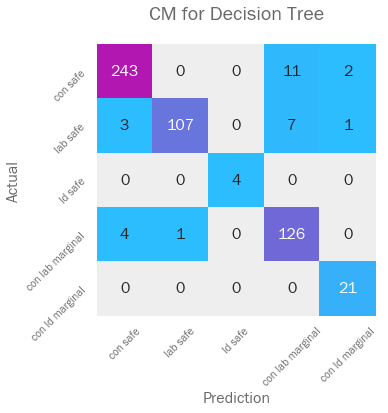

In [13]:
conf_matrix(y_eng,
            gs_tree.predict(X_eng),
            title = 'CM for Decision Tree',
            labels = ['con safe', 'lab safe',
                      'ld safe', 'con lab marginal',
                      'con ld marginal'])

Not a bad outcome then, though we could probably do better.

Let's see how it gets on with the GB dataset with fewer features.

(Note - we comment this out after running, then use pickle to save the model that it creates).

In [14]:
# #Declare a classifier to use
# clf = DecisionTreeClassifier()

# #Create a parameter grid, and run it through the GridSearch class
# param_grid = {
#     "criterion": ["gini", "entropy"],
#     "max_depth": range(1,10),
#     "min_samples_split": range(2,10)
# }
# gs_tree2 = GridSearchCV(clf, param_grid, cv=4, n_jobs=-1)
# gs_tree2.fit(X_gb_smote, y_gb_smote)

Let's save down this model so we don't have to run it again...

(This is commented out for now...)

In [15]:
# with open('Models/df_tree_gb.pickle', 'wb') as f:
#     pickle.dump(gs_tree2, f, pickle.HIGHEST_PROTOCOL)

And load it, in case we're running the notebook again.

In [16]:
with open('Models/df_tree_gb.pickle', 'rb') as f:
    gs_tree2 = pickle.load(f)

#Print off the best parameters, and the best score
print('Best Parameters: ', gs_tree2.best_params_)

print('Accuracy of Best Parameters: ',
      accuracy_score(y_gb, gs_tree2.predict(X_gb)))

Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 2}
Accuracy of Best Parameters:  0.9392


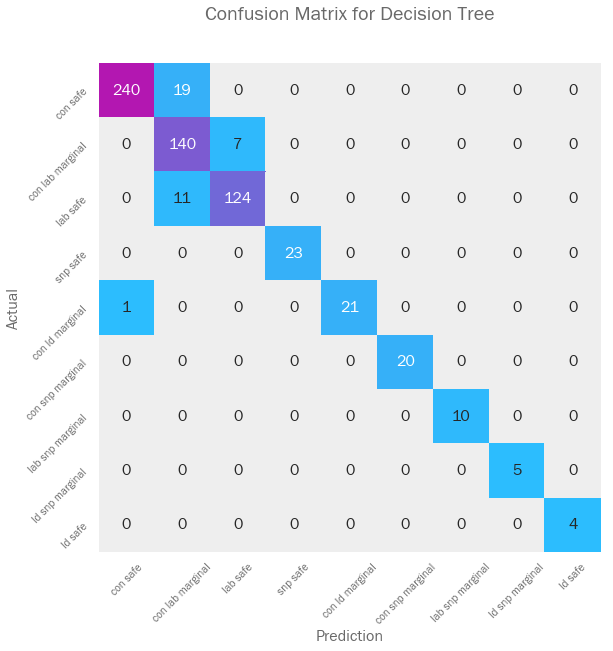

In [17]:
conf_matrix(y_gb,
            gs_tree2.predict(X_gb), size=0.7,
            title = 'Confusion Matrix for Decision Tree\n',
            labels = list(y_gb.value_counts().index))

It hasn't done too badly, considering the lower number of features. Indeed, it's done pretty well with a lot of the minority classes, such as the lib dem safe seats. There is, however, some confusion around marginal seats, which we can see in the top left corner.

Let's see which constituencies have been mis-predicted here.

In [18]:
#Load a dataframe of constituency names
df_names = pd.read_csv('Datasets/names.csv', header=-1)
df_names.rename(columns={0:'ID',1:'Name'}, inplace=True)
df_names.set_index('ID', inplace=True, drop=True)


def pred_df(preds, actual, model=None, incorrect=True,
            scope='gb', kpis=['seat_types_17']):
    
    '''
    Returns a dataframe showing predictions against actual results
    
    preds (list): the predictions made by an algorithm
    actual (list): the actual values
    model (string): a string to append to the column name of the preds
    incorrect (bool): only show seats that were wrongly predicted
    scope ('eng' or 'gb'): depending on which dataset we're using
    kpis (list): a list of extra kpis to include
    '''
    
    #Create a dataframe object of our predictions and actual
    if scope == 'gb':
        preds_df = pd.DataFrame(preds, index=X_gb.index)
        actual_df = pd.DataFrame(actual, index=X_gb.index)
        kpi_df = df_gb[kpis]
        
    elif scope == 'eng':
        preds_df = pd.DataFrame(preds, index=X_eng.index)
        actual_df = pd.DataFrame(actual, index=X_eng.index)
        kpi_df = df_eng[kpis]

    #Create a dataframe comparing the predictions and the actual values
    comparison_df =  pd.concat([preds_df, actual_df],
                               axis=1, join='inner')
    
    comparison_df.columns = [f'{model} Pred', 'Actual']
    
    #Return a dataframe with names and required KPIs
    df_temp =  pd.concat([df_names, comparison_df, kpi_df],
                         axis=1, join='inner')
    
    df_temp.sort_values([f'{model} Pred','Actual'], inplace=True)
    
    if incorrect == True:
        return df_temp.loc[df_temp[f'{model} Pred'] != df_temp['Actual']]
    
    else:
        return df_temp

Use the function above...

In [19]:
pred_df_tree_eng = pred_df(gs_tree.predict(X_eng),
                           y_eng,
                           model='Decision Tree',
                           scope='eng')
pred_df_tree_eng

,Name,Decision Tree Pred,Actual,seat_types_17
ID,,,,
E14000610,Burton,con lab marginal,con safe,con safe
E14000620,Carlisle,con lab marginal,con safe,con lab marginal
E14000693,Epping Forest,con lab marginal,con safe,con safe
E14000695,Erewash,con lab marginal,con safe,con lab marginal
E14000722,Halesowen and Rowley Regis,con lab marginal,con safe,con lab marginal
E14000810,Mansfield,con lab marginal,con safe,con lab marginal
E14000812,Meriden,con lab marginal,con safe,con safe
E14000868,Nuneaton,con lab marginal,con safe,con lab marginal
E14000875,Pendle,con lab marginal,con safe,con lab marginal


In [20]:
pred_df_tree_gb = pred_df(gs_tree2.predict(X_gb),
                          y_gb,
                          model='Decision Tree')
pred_df_tree_gb

,Name,Decision Tree Pred,Actual,seat_types_17
ID,,,,
E14000533,Amber Valley,con lab marginal,con safe,con safe
E14000543,Barrow and Furness,con lab marginal,con safe,con lab marginal
E14000572,Blackpool North and Cleveleys,con lab marginal,con safe,con lab marginal
E14000580,Bolton West,con lab marginal,con safe,con lab marginal
E14000596,Brigg and Goole,con lab marginal,con safe,con safe
E14000620,Carlisle,con lab marginal,con safe,con lab marginal
E14000643,Cleethorpes,con lab marginal,con safe,con safe
E14000647,Copeland,con lab marginal,con safe,con lab marginal
E14000648,Corby,con lab marginal,con safe,con lab marginal


## ii. Random Forests

Given that the optimised trees actually did pretty well with our data before, we should expect great things from a random forest. Recall - a random forest is a collection of trees that aggregate 'opinion' to classify a datapoint.

Again, let's start with a vanilla version on the English dataset.

In [21]:
forest = RandomForestClassifier()
forest.fit(X_eng_train_smote, y_eng_train_smote)
y_preds = forest.predict(X_eng_test)

print('Accuracy:', accuracy_score(y_eng_test, y_preds))

Accuracy: 0.7421383647798742


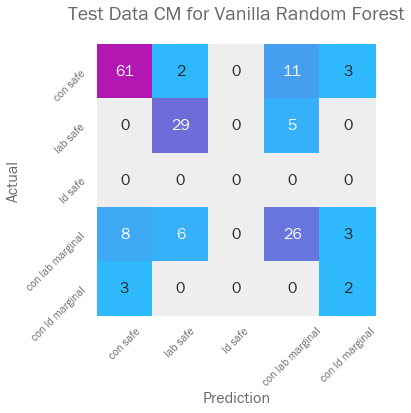

In [22]:
conf_matrix(y_eng_test, y_preds,
            labels=['con safe', 'lab safe',
                    'ld safe', 'con lab marginal',
                    'con ld marginal'],
           title='Test Data CM for Vanilla Random Forest')

Not a bad effort, and certainly better than the vanilla tree did on its own. However, there's definitely scope to improve performance. Let's use the grid search method again to optimise hyperparameters.

(We comment this out after running, save, and re-load using pickle).

In [23]:
# forest = RandomForestClassifier()
# param_grid = {
#     "criterion": ["gini", "entropy"],
#     "n_estimators": list(np.arange(3,16,2)),
#     "max_depth": list(np.arange(2,10,2)),
#     "min_samples_split": list(np.arange(2,10,2)),
#     "max_features": list(np.arange(5,95,15))
# }
# gs_forest_eng = GridSearchCV(forest, param_grid, cv=4, n_jobs=-1)
# gs_forest_eng.fit(X_eng_smote, y_eng_smote)

As normal, let's save down, and re-open with pickle.

In [24]:
# with open('Models/forest_eng.pickle', 'wb') as f:
#     pickle.dump(gs_forest_eng, f, pickle.HIGHEST_PROTOCOL)

In [25]:
with open('Models/forest_eng.pickle', 'rb') as f:
    gs_forest_eng = pickle.load(f)
    
#Print off the best parameters, and the best score
print('Best Parameters: ', gs_forest_eng.best_params_)

print('Accuracy of Best Parameters: ',
      accuracy_score(y_eng, gs_forest_eng.predict(X_eng)))

forest_eng = gs_forest_eng.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 20, 'min_samples_split': 8, 'n_estimators': 15}
Accuracy of Best Parameters:  0.9792452830188679


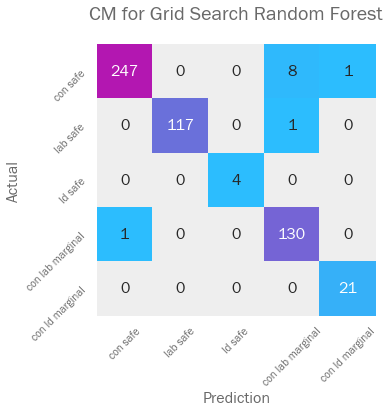

In [26]:
conf_matrix(y_eng, gs_forest_eng.predict(X_eng),
            labels=['con safe', 'lab safe',
                    'ld safe', 'con lab marginal',
                    'con ld marginal'],
           title='CM for Grid Search Random Forest')

Let's see which constituencies have been predicted incorrectly. We see that most of the errors are safe Conservative seats, predicted to be Labour marginals.

In [27]:
pred_df(gs_forest_eng.predict(X_eng), y_eng,
        scope='eng', model='Random Forest')

,Name,Random Forest Pred,Actual,seat_types_17
ID,,,,
E14000644,Colchester,con lab marginal,con safe,con lab marginal
E14000862,Northampton South,con lab marginal,con safe,con lab marginal
E14000875,Pendle,con lab marginal,con safe,con lab marginal
E14000879,"Plymouth, Moor View",con lab marginal,con safe,con lab marginal
E14000902,Rossendale and Darwen,con lab marginal,con safe,con lab marginal
E14000974,Stoke-on-Trent South,con lab marginal,con safe,con lab marginal
E14000989,Telford,con lab marginal,con safe,con lab marginal
E14001052,Worcester,con lab marginal,con safe,con lab marginal
E14000541,Barnsley Central,con lab marginal,lab safe,lab safe


Let's try creating another random forest with the Great Britain dataset.

(Comment out, then load the pickle file).

In [28]:
# forest = RandomForestClassifier()
# param_grid = {
#     "criterion": ["gini", "entropy"],
#     "n_estimators": list(np.arange(3,16,2)),
#     "max_depth": list(np.arange(2,10,2)),
#     "min_samples_split": list(np.arange(2,10,2)),
#     "max_features": list(np.arange(5,95,15))
# }
# gs_forest_gb = GridSearchCV(forest, param_grid, cv=4, n_jobs=-1)
# gs_forest_gb.fit(X_gb_smote, y_gb_smote)

In [29]:
# with open('Models/forest_gb.pickle', 'wb') as f:
#     pickle.dump(gs_forest_gb, f, pickle.HIGHEST_PROTOCOL)

In [30]:
with open('Models/forest_gb.pickle', 'rb') as f:
    gs_forest_gb = pickle.load(f)
    
#Print off the best parameters, and the best score
print('Best Parameters: ', gs_forest_gb.best_params_)

print('Accuracy of Best Parameters: ',
      accuracy_score(y_gb, gs_forest_gb.predict(X_gb)))


forest_gb = gs_forest_gb.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 35, 'min_samples_split': 4, 'n_estimators': 11}
Accuracy of Best Parameters:  0.9536


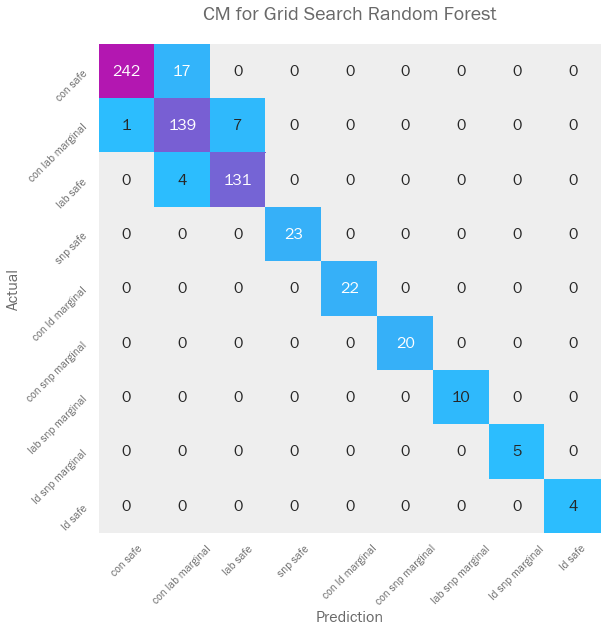

In [31]:
conf_matrix(y_gb,
            forest_gb.predict(X_gb), size=0.7,
            title = 'CM for Grid Search Random Forest',
            labels = list(y_gb.value_counts().index))

In [32]:
pred_df(forest_gb.predict(X_gb), y_gb,
        scope='gb', model='Random Forest')

,Name,Random Forest Pred,Actual,seat_types_17
ID,,,,
E14000572,Blackpool North and Cleveleys,con lab marginal,con safe,con lab marginal
E14000580,Bolton West,con lab marginal,con safe,con lab marginal
E14000584,Bournemouth East,con lab marginal,con safe,con safe
E14000585,Bournemouth West,con lab marginal,con safe,con safe
E14000620,Carlisle,con lab marginal,con safe,con lab marginal
E14000672,Dudley South,con lab marginal,con safe,con safe
E14000810,Mansfield,con lab marginal,con safe,con lab marginal
E14000820,Middlesbrough South and East Cleveland,con lab marginal,con safe,con lab marginal
E14000862,Northampton South,con lab marginal,con safe,con lab marginal


## iii. XGBoost

The random forest came very close to full accuracy for both the Enlgish and British datasets, with accuracies around the 98% / 95% mark respectively.

Let's try XGBoost to see if we can squeeze a few more percent out of the data. As before, let's try a simple run of a vanilla version of the algorithm on the English training data.

In [33]:
XGB = xgb.XGBClassifier()
XGB.fit(X_eng_train_smote, y_eng_train_smote)

y_preds = XGB.predict(X_eng_test)

print('Accuracy:', accuracy_score(y_preds, y_eng_test))

Accuracy: 0.7484276729559748


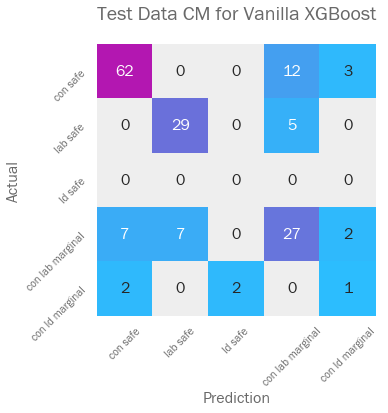

In [34]:
conf_matrix(y_eng_test, y_preds,
            labels=['con safe', 'lab safe',
                    'ld safe', 'con lab marginal',
                    'con ld marginal'],
           title='Test Data CM for Vanilla XGBoost')

So we're nearly at 80% accuracy, just from the vanilla version of the model!

Let's try to get this even further through parameter tuning.

(This is commented out now - we have saved the models down using Pickle).

In [35]:
# XGB = xgb.XGBClassifier()
# param_grid = {
#     "eta": [0.01, 0.05, 0.2],
#     "min_child_weight": [0, 1, 5],
#     "max_depth": [3, 6, 10],
#     "gamma": [0, 1, 5],
#     "subsample": [0.6, 0.8, 1],
#     "colsample_bytree ": [0.6, 0.8, 1]
# }

# gs_xgb_eng = GridSearchCV(XGB, param_grid, cv=3, n_jobs=-1)
# gs_xgb_eng.fit(X_eng_smote, y_eng_smote)

In [36]:
# with open('Models/xgb_eng.pickle', 'wb') as f:
#     pickle.dump(gs_xgb_eng, f, pickle.HIGHEST_PROTOCOL)

In [37]:
with open('Models/xgb_eng.pickle', 'rb') as f:
    gs_xgb_eng = pickle.load(f)
    
xgb_eng = gs_xgb_eng.best_estimator_
    
#Print off the best parameters, and the best score
print('Best Parameters: ', gs_xgb_eng.best_params_)

print('Accuracy of Best Parameters: ',
      accuracy_score(y_eng, xgb_eng.predict(X_eng)))

Best Parameters:  {'colsample_bytree ': 0.6, 'eta': 0.01, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 0, 'subsample': 0.6}
Accuracy of Best Parameters:  1.0


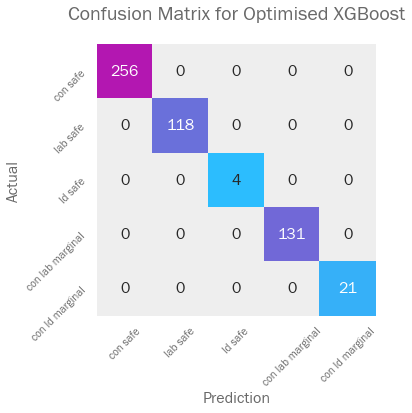

In [38]:
conf_matrix(y_eng, gs_xgb_eng.predict(X_eng),
            labels=['con safe', 'lab safe',
                    'ld safe', 'con lab marginal',
                    'con ld marginal'],
           title='Confusion Matrix for Optimised XGBoost')

We've reached 100% accuracy with the optimised XG Boost! Let's investigate the Permutation Importance to see which factors are driving this model.

In [39]:
perm = PermutationImportance(xgb_eng).fit(X_eng, y_eng)

In [40]:
eli5.show_weights(perm, feature_names = X_eng.columns.tolist())

Weight,Feature
0.0034 ± 0.0015,%17Turnout
0.0011 ± 0.0018,%80+YO
0.0004 ± 0.0015,%Unemployment
0.0004 ± 0.0015,%Christian
0 ± 0.0000,UnemploymentChange
0 ± 0.0000,2019Wage
0 ± 0.0000,HousePrice
0 ± 0.0000,%HousePriceGrowth
0 ± 0.0000,HousePricePerWage
0 ± 0.0000,%OwnOutright


This implies that very few factors influence the model at an English level. It's likely that many factors are included in the %Christian and %80+ year olds features (e.g. ethnicity, leave vote and home ownership are likely to be correlated).

Let's now look at the GB dataset, using the same gridsearch method.

In [41]:
# XGB = xgb.XGBClassifier()
# param_grid = {
#     "eta": [0.01, 0.05, 0.2],
#     "min_child_weight": [0, 1, 5],
#     "max_depth": [3, 6, 10],
#     "gamma": [0, 1, 5],
#     "subsample": [0.6, 0.8, 1],
#     "colsample_bytree ": [0.6, 0.8, 1]
# }

# gs_xgb_gb = GridSearchCV(XGB, param_grid, cv=4, n_jobs=-1)
# gs_xgb_gb.fit(X_gb_smote, y_gb_smote)

In [42]:
# with open('Models/xgb_gb.pickle', 'wb') as f:
#     pickle.dump(gs_xgb_gb, f, pickle.HIGHEST_PROTOCOL)

In [43]:
with open('Models/xgb_gb.pickle', 'rb') as f:
    gs_xgb_gb = pickle.load(f)
    
xgb_gb = gs_xgb_gb.best_estimator_
    
#Print off the best parameters, and the best score
print('Best Parameters: ', gs_xgb_gb.best_params_)

print('Accuracy of Best Parameters: ',
      accuracy_score(y_gb, xgb_gb.predict(X_gb)))

Best Parameters:  {'colsample_bytree ': 0.6, 'eta': 0.01, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6}
Accuracy of Best Parameters:  1.0


As we can see, we have 100% accuracy! Let's look at the confusion matrix.

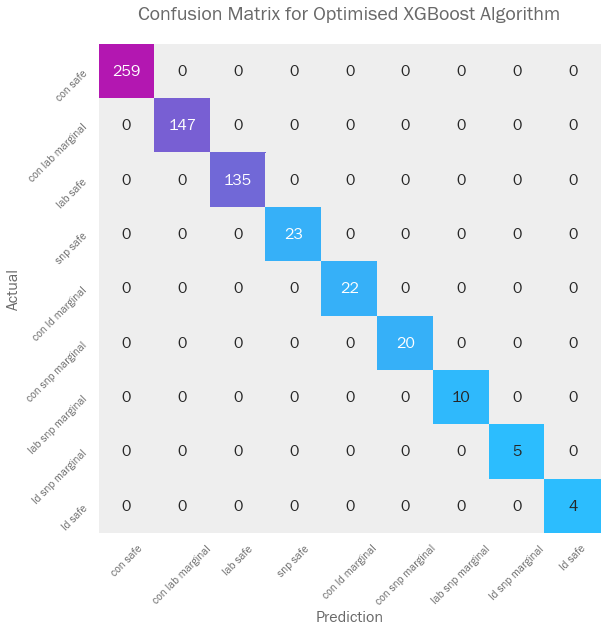

In [44]:
conf_matrix(y_gb, xgb_gb.predict(X_gb),
            labels=list(y_gb.value_counts().index),
           title='Confusion Matrix for Optimised XGBoost Algorithm',
           size=3)

Again, let's check the permutation importances.

In [45]:
perm = PermutationImportance(xgb_gb).fit(X_gb, y_gb)

In [46]:
eli5.show_weights(perm, feature_names = X_gb.columns.tolist(), top=15)

Weight,Feature
0.0317 ± 0.0024,Region_Scotland
0.0179 ± 0.0065,%LeaveVote
0.0131 ± 0.0079,%Agriculture
0.0096 ± 0.0035,%Christian
0.0077 ± 0.0037,%Level3
0.0064 ± 0.0029,Population
0.0048 ± 0.0045,%OwnOutright
0.0042 ± 0.0016,HousePricePerWage
0.0042 ± 0.0016,%Unemployment
0.0026 ± 0.0038,%Level2


In [47]:
weight_bases = np.array(
               [0.0330,0.0218,0.0163,
                0.0090,0.0074,0.0070,
                0.0070,0.0048,0.0038,
                0.0032,0.0029,0.0026,
                0.0022,0.0013,0.0013])

weight_vars = np.array(
              [0.0066,0.0129,0.0062,
               0.0026,0.0033,0.0038,
               0.0059,0.0040,0.0043,
               0.0029,0.0024,0.0038,
               0.0016,0.0013,0.0013])

weight_feats = ['Scottish Seat', '% Leave Vote',
                '% Agricultural Workers','% Level 3 Educated',
                '% Christian','Constituency Population',
                '% Own House Outright','House Price Per Wage',
                '17 Election Turnout','% Unemployment',
                '% Public Admin & Defence Workers',
                '% Level 2 Educated','% Living in Social Housing',
                '% 20-29 Year Olds','2019 Median Wage']

weight_mins = weight_bases - weight_vars
weight_maxs = weight_bases + weight_vars

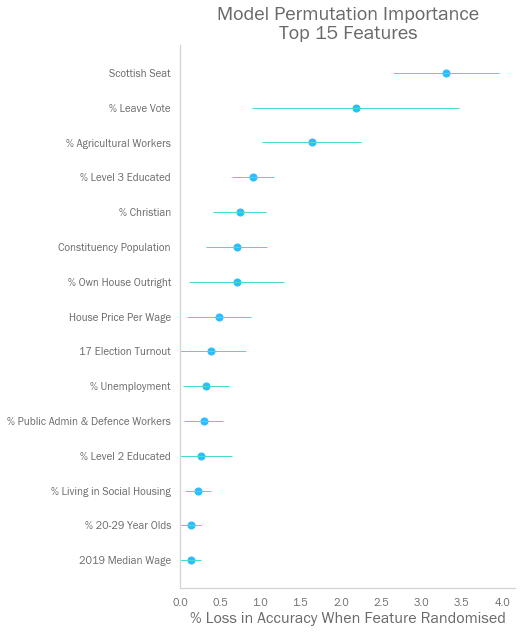

In [48]:
plt.figure(figsize=(6,10))

plt.hlines(range(0,15),
           weight_mins[::-1]*100,
           weight_maxs[::-1]*100,
           color=CB91_Green,lw=1)

plt.scatter(weight_bases[::-1]*100,
            list(range(0,15)),
            s=50)

plt.title('Model Permutation Importance\nTop 15 Features')
plt.xlabel('% Loss in Accuracy When Feature Randomised')

plt.yticks(ticks = range(0,15),
           labels = weight_feats[::-1])
plt.xlim(0);

The UK dataset provides many more important features. Let's consider how the most important ones play out across the different parties.

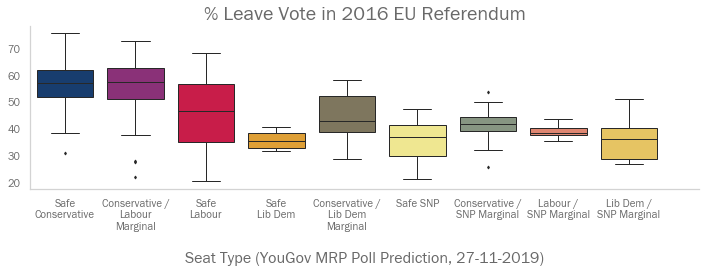

In [49]:
plt.figure(figsize=(12, 3))
sns.boxplot(x='seat_types_yg',
            y='%LeaveVote',
            palette=party_colors,
            data=df_gb *100,
            linewidth=1,
            fliersize=2)

plt.xticks(ticks = range(0,10),
           labels=party_labels)

plt.xlabel('\nSeat Type (YouGov MRP Poll Prediction, 27-11-2019)')
plt.ylabel('')
plt.title('% Leave Vote in 2016 EU Referendum');

We can see how the leave vote share could be an important factor in deciding the seat type — there are stark differences across the categories. Two key things jump out from Labour’s perspective:

* The seats that Labour was competitive in (i.e. Labour safe seats, plus its marginals) cover a very wide range of values, from 20% to nearly 70%. Thus, a single position on EU membership would have failed to appease all of its potential voters simultaneously.
* The Labour / Conservative marginal seats look much more similar to safe Conservative seats than to save Labour seats. Thus, the Conservatives were able to have a more focussed Brexit policy, without the risk of alienating either its core base, or its potential voters in Labour marginals.

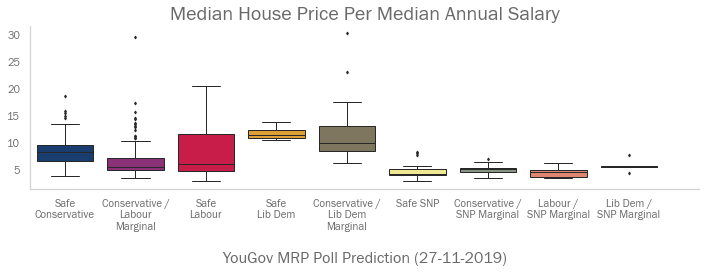

In [50]:
plt.figure(figsize=(12, 3))
sns.boxplot(x='seat_types_yg',
            y='HousePricePerWage',
            palette=party_colors,
            data=df_gb,
            linewidth=1,
            fliersize=2)

plt.xticks(ticks = range(0,10),
           labels=party_labels)

plt.xlabel('\nYouGov MRP Poll Prediction (27-11-2019)')
plt.ylabel('')
plt.title('Median House Price Per Median Annual Salary');

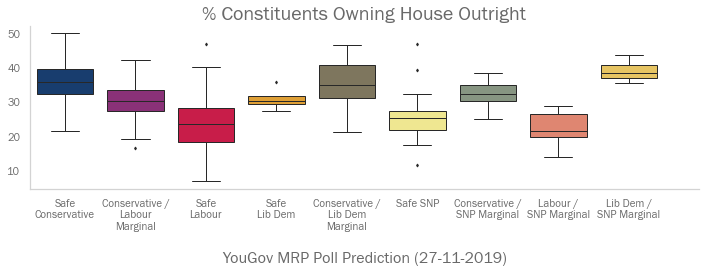

In [51]:
plt.figure(figsize=(12, 3))
sns.boxplot(x='seat_types_yg',
            y='%OwnOutright',
            palette=party_colors,
            data=df_gb*100,
            linewidth=1,
            fliersize=2)

plt.xticks(ticks = range(0,10),
           labels=party_labels)

plt.xlabel('\nYouGov MRP Poll Prediction (27-11-2019)')
plt.ylabel('')
plt.title('% Constituents Owning House Outright');

These two findings manifest themselves across many other KPIs with high permutation importance. Consider the two most important features pertaining to home ownership, above.

The potential Labour seats are spread over a very wide range of values in both cases, and, as with the Brexit vote, the Conservative / Labour marginals look much more like safe Conservative seats than they do safe Labour seats.

This is often the case across the other important KPIs.

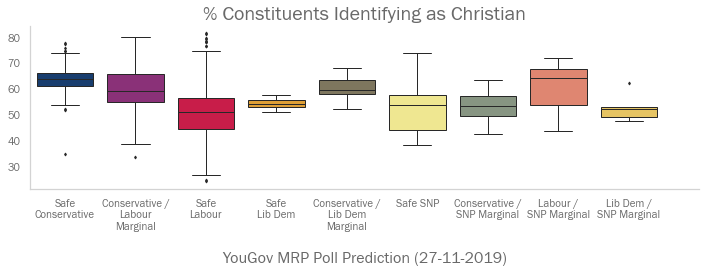

In [52]:
plt.figure(figsize=(12, 3))
sns.boxplot(x='seat_types_yg',
            y='%Christian',
            palette=party_colors,
            data=df_gb*100,
            linewidth=1,
            fliersize=2)

plt.xticks(ticks = range(0,10),
           labels=party_labels)

plt.xlabel('\nYouGov MRP Poll Prediction (27-11-2019)')
plt.ylabel('')
plt.title('% Constituents Identifying as Christian');

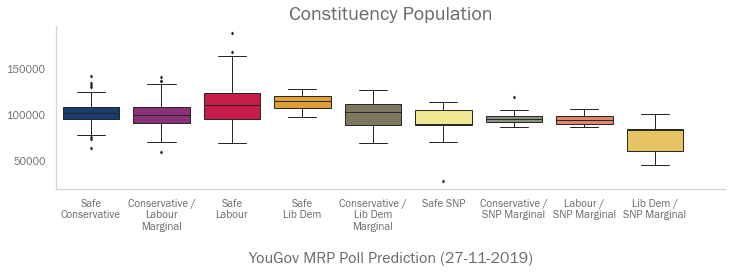

In [53]:
plt.figure(figsize=(12, 3))
sns.boxplot(x='seat_types_yg',
            y='Population',
            palette=party_colors,
            data=df_gb,
            linewidth=1,
            fliersize=2)

plt.xticks(ticks = range(0,10),
           labels=party_labels)

plt.xlabel('\nYouGov MRP Poll Prediction (27-11-2019)')
plt.ylabel('')
plt.title('Constituency Population');

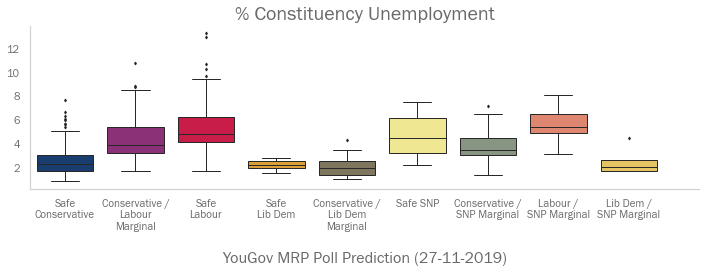

In [54]:
plt.figure(figsize=(12, 3))
sns.boxplot(x='seat_types_yg',
            y='%Unemployment',
            palette=party_colors,
            data=df_gb*100,
            linewidth=1,
            fliersize=2)

plt.xticks(ticks = range(0,10),
           labels=party_labels)

plt.xlabel('\nYouGov MRP Poll Prediction (27-11-2019)')
plt.ylabel('')
plt.title('% Constituency Unemployment');

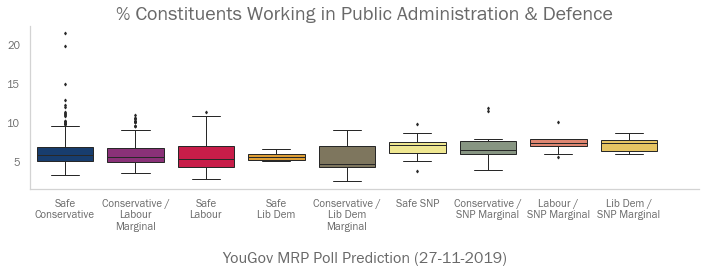

In [55]:
plt.figure(figsize=(12, 3))
sns.boxplot(x='seat_types_yg',
            y='%Public Admin & Defence',
            palette=party_colors,
            data=df_gb*100,
            linewidth=1,
            fliersize=2)

plt.xticks(ticks = range(0,10),
           labels=party_labels)

plt.xlabel('\nYouGov MRP Poll Prediction (27-11-2019)')
plt.ylabel('')
plt.title('% Constituents Working in Public Administration & Defence');

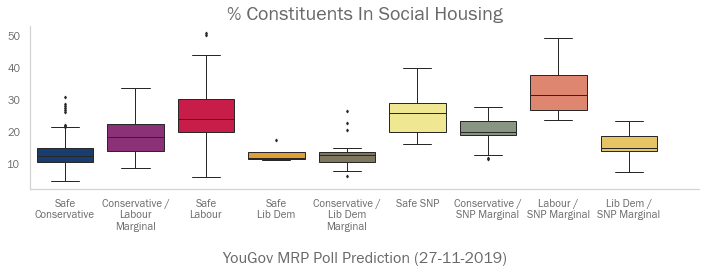

In [56]:
plt.figure(figsize=(12, 3))
sns.boxplot(x='seat_types_yg',
            y='%SocialHousing',
            palette=party_colors,
            data=df_gb*100,
            linewidth=1,
            fliersize=2)

plt.xticks(ticks = range(0,10),
           labels=party_labels)

plt.xlabel('\nYouGov MRP Poll Prediction (27-11-2019)')
plt.ylabel('')
plt.title('% Constituents In Social Housing');

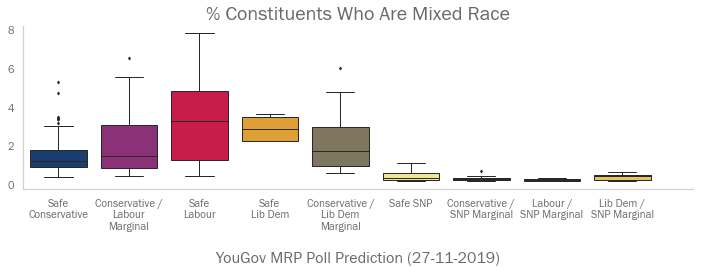

In [57]:
plt.figure(figsize=(12, 3))
sns.boxplot(x='seat_types_yg',
            y='%Mixed',
            palette=party_colors,
            data=df_gb*100,
            linewidth=1,
            fliersize=2)

plt.xticks(ticks = range(0,10),
           labels=party_labels)

plt.xlabel('\nYouGov MRP Poll Prediction (27-11-2019)')
plt.ylabel('')
plt.title('% Constituents Who Are Mixed Race');

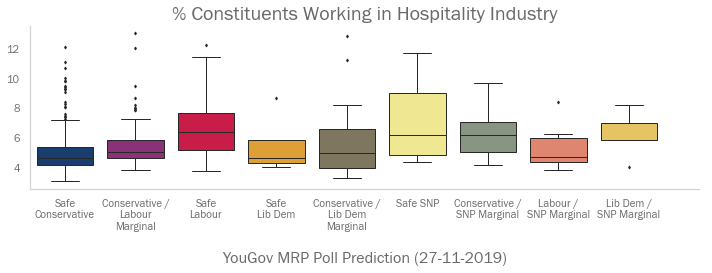

In [58]:
plt.figure(figsize=(12, 3))
sns.boxplot(x='seat_types_yg',
            y='%Hospitality',
            palette=party_colors,
            data=df_gb*100,
            linewidth=1,
            fliersize=2)

plt.xticks(ticks = range(0,10),
           labels=party_labels)

plt.xlabel('\nYouGov MRP Poll Prediction (27-11-2019)')
plt.ylabel('')
plt.title('% Constituents Working in Hospitality Industry');

## Conclusion

All of this meant that the Conservatives were better placed to run a focussed campaign that would still appeal to a broad range of constituencies. Labour, however, were forced to appeal to a very wide range of voters, which came across in their campaign, which came across as muddled and too wide-ranging.

These demographics are not likely to shift around any time soon, and Labour is obliged to take back these marginal seats if it ever wants to win an election. Does this mean that it is doomed to failure?

Uniting the various types of voter that might support Labour looks like a difficult task, especially when the Conservatives are able to be much more targeted. If nothing else, it would take seriously talented leadership, and there is significant evidence to suggest that Labour was sorely lacking this in the 2019 election.